In [66]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [67]:
# Read clean data
# df = pd.read_excel('Data/Great Asia Africa Text Clean.xlsx')
df = pd.read_excel('Data/Tangkuban Parahu Text Clean.xlsx')
df = df.dropna().reset_index(drop=True)

# Sampel
df = df.sample(n=300).reset_index(drop=True)
# df = df.head(300)

df

,Review,Review_clean
0,Di tangkuban perahu tempatnya sangat menarik,tangkuban perahu tempat tarik
1,"bagus, enak buat wisata",bagus enak wisata
2,"Ramai pengunjung, hampir ga kebagian parkir",ramai unjung ga bagi parkir
3,Pemandanganya ok,pemandanganya ok
4,Plus:\n1. Kondisi alam nya masih terjaga.\n\nM...,plus kondisi alam nya terjagaminus tiket masuk...
...,...,...
295,Direkomendasikan untuk jalan-jalan di Bandung,rekomendasi jalanjalan bandung
296,Tiket masuk 30 rb per orang termasuk utk kenda...,tiket masuk rb orang utk kendara rb jghindari ...
297,"Pemandangannya bagus, tapi hanya bisa berfoto ...",pandang bagus foto nikmat pandang
298,Suasananya asyik buat nyantai. Guidenya baik s...,suasana asyik nyantai guidenya suka cerita per...


In [68]:
text = df['Review_clean']

for i in text:
    print(i.split())

['tangkuban', 'perahu', 'tempat', 'tarik']
['bagus', 'enak', 'wisata']
['ramai', 'unjung', 'ga', 'bagi', 'parkir']
['pemandanganya', 'ok']
['plus', 'kondisi', 'alam', 'nya', 'terjagaminus', 'tiket', 'masuk', 'laku', 'utk', 'lokasi', 'utk', 'masuk', 'kawah', 'domas', 'bayar', 'tiket', 'parkir', 'kendara', 'utk', 'masuk', 'pala', 'mohon', 'ditertibkannomor', 'menggangu', 'nyaman', 'tangkuban', 'parahu', 'bintang', 'railguard', 'pagar', 'pinggir', 'tambah', 'tinggi', 'alhamdulillah', 'duduk', 'indonesia', 'tinggi', 'pagar']
['udara', 'dingin']
['udara', 'dingin', 'kesana', 'hujan', 'untung', 'kawah', 'tutup', 'kabut', 'wisata', 'cocok', 'keluarga']
['seru']
['arah', 'pintu', 'gerbang', 'tikung', 'asstro', 'highland', 'jalan', 'lokasi', 'lumayan', 'pintu', 'gerbang', 'beli', 'tiket', 'masuk', 'harga', 'tiket', 'masuk', 'orang', 'k', 'kendara', 'roda', 'k', 'tata', 'parkir', 'k']
['indah', 'nyaman', 'refresing']
['cocok', 'bawa', 'keluarga', 'piknik']
['dateng', 'pagi', 'pas', 'kabut', 'pun

In [69]:
text = df['Review_clean']
text_list =  [i.split() for i in text]

print(len(text_list))
print(text_list)

300
[['tangkuban', 'perahu', 'tempat', 'tarik'], ['bagus', 'enak', 'wisata'], ['ramai', 'unjung', 'ga', 'bagi', 'parkir'], ['pemandanganya', 'ok'], ['plus', 'kondisi', 'alam', 'nya', 'terjagaminus', 'tiket', 'masuk', 'laku', 'utk', 'lokasi', 'utk', 'masuk', 'kawah', 'domas', 'bayar', 'tiket', 'parkir', 'kendara', 'utk', 'masuk', 'pala', 'mohon', 'ditertibkannomor', 'menggangu', 'nyaman', 'tangkuban', 'parahu', 'bintang', 'railguard', 'pagar', 'pinggir', 'tambah', 'tinggi', 'alhamdulillah', 'duduk', 'indonesia', 'tinggi', 'pagar'], ['udara', 'dingin'], ['udara', 'dingin', 'kesana', 'hujan', 'untung', 'kawah', 'tutup', 'kabut', 'wisata', 'cocok', 'keluarga'], ['seru'], ['arah', 'pintu', 'gerbang', 'tikung', 'asstro', 'highland', 'jalan', 'lokasi', 'lumayan', 'pintu', 'gerbang', 'beli', 'tiket', 'masuk', 'harga', 'tiket', 'masuk', 'orang', 'k', 'kendara', 'roda', 'k', 'tata', 'parkir', 'k'], ['indah', 'nyaman', 'refresing'], ['cocok', 'bawa', 'keluarga', 'piknik'], ['dateng', 'pagi', 'pas

# Creating Bigram & Trigram Models

Bigrams adalah dua kata yang sering muncul bersama dalam dokumen. Trigram adalah 3 kata yang sering muncul.

In [70]:
import gensim

#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.

bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [71]:
for idx in range(len(text_list)):
    for token in trigram[text_list[idx]]:
        print(token)

tangkuban_perahu
tempat
tarik
tangkuban_perahu
tangkuban_perahu
tangkuban_perahu
bagus
enak
wisata
ramai
unjung
ga
bagi
parkir
pemandanganya
ok
plus
kondisi
alam
nya
terjagaminus
tiket_masuk
laku
utk
lokasi
utk
masuk
kawah_domas
bayar
tiket
parkir
kendara
utk
masuk
pala
mohon
ditertibkannomor
menggangu
nyaman
tangkuban_parahu
bintang
railguard
pagar
pinggir
tambah
tinggi
alhamdulillah
duduk
indonesia
tinggi
pagar
tiket_masuk
tiket_masuk
kawah_domas
tangkuban_parahu
tiket_masuk
udara
dingin
udara
dingin
kesana
hujan
untung
kawah
tutup
kabut
wisata
cocok
keluarga
seru
arah
pintu
gerbang
tikung
asstro
highland
jalan
lokasi
lumayan
pintu
gerbang
beli
tiket_masuk
harga
tiket_masuk
orang
k
kendara
roda
k
tata
parkir
k
tiket_masuk
tiket_masuk
tiket_masuk
tiket_masuk
tiket_masuk
tiket_masuk
indah
nyaman
refresing
cocok
bawa
keluarga
piknik
dateng
pagi
pas
kabut
puncak
gunung
mudah
transit
mobil
belah
kawah
salah
tuju
wisata
bandung
lembang
lewat
halhal
dua
tangkuban_perahu
beda
bersih
tata
tat

# Create the Dictionary

Dua input utama untuk Topic Modeling LDA adalah dictionary dan corpus.

Buat kamus dari ‘text_list’ yang berisi berapa kali sebuah kata muncul di training set.

In [72]:
from gensim import corpora, models

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
# dictionary.filter_extremes(no_below=5, no_above=0.2) 
dictionary.filter_extremes() 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<145 unique tokens: ['perahu', 'tangkuban', 'tangkuban_perahu', 'tarik', 'tempat']...>


In [73]:
len(text_list)

300

In [74]:
dictionary

# Create the Corpus

Gensim membuat id unik untuk setiap kata dalam dokumen. Korpus yang dihasilkan ditunjukkan di atas adalah pemetaan dari (word_id, word_frequency).

Misalnya , (6, 1) di atas menyiratkan, kata id 6 muncul sekali dalam dokumen pertama. Demikian juga, kata id 10 muncul dua kali dan seterusnya.

In [75]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

#The function doc2bow converts document (a list of words) into the bag-of-words format
'''Fungsi doc2bow() hanya menghitung jumlah kemunculan setiap kata yang berbeda, 
mengubah kata tersebut menjadi id kata bilangan bulatnya 
dan mengembalikan hasilnya sebagai vektor renggang. 
Oleh karena itu, vektor renggang [(0, 1), (1, 1)] berbunyi: dalam 
dokumen “Interaksi manusia-komputer”, kata komputer (id 0) dan 
manusia (id 1) muncul satu kali; sepuluh kata kamus lainnya muncul (secara implisit) nol kali.'''

print(len(doc_term_matrix))
# print(doc_term_matrix[1])


300


In [76]:
print(doc_term_matrix[4])

[(1, 1), (9, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 3), (27, 3)]


In [77]:
df

,Review,Review_clean
0,Di tangkuban perahu tempatnya sangat menarik,tangkuban perahu tempat tarik
1,"bagus, enak buat wisata",bagus enak wisata
2,"Ramai pengunjung, hampir ga kebagian parkir",ramai unjung ga bagi parkir
3,Pemandanganya ok,pemandanganya ok
4,Plus:\n1. Kondisi alam nya masih terjaga.\n\nM...,plus kondisi alam nya terjagaminus tiket masuk...
...,...,...
295,Direkomendasikan untuk jalan-jalan di Bandung,rekomendasi jalanjalan bandung
296,Tiket masuk 30 rb per orang termasuk utk kenda...,tiket masuk rb orang utk kendara rb jghindari ...
297,"Pemandangannya bagus, tapi hanya bisa berfoto ...",pandang bagus foto nikmat pandang
298,Suasananya asyik buat nyantai. Guidenya baik s...,suasana asyik nyantai guidenya suka cerita per...


# MODEL

In [78]:
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

# Coherence score

Penentuan banyaknya model topik dilakukan dengan cara melihat visualisasi pada grafik coherence score. Coherence score adalah ukuran yang digunakan untuk mengevaluasi Topic Modeling, model yang baik akan menghasilkan topik dengan skor koherensi topik yang tinggi.

Semakin besar coherence score, maka semakin baik pula hasil interpretasi topic modeling yang dihasilkan. Coherence score yang dihasilkan pada jumlah topik tersebut adalah sebesar 0.450204. Berdasarkan hasil terbaik pada nilai coherence score tersebut, maka dapat diambil 12 topik.

In [79]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

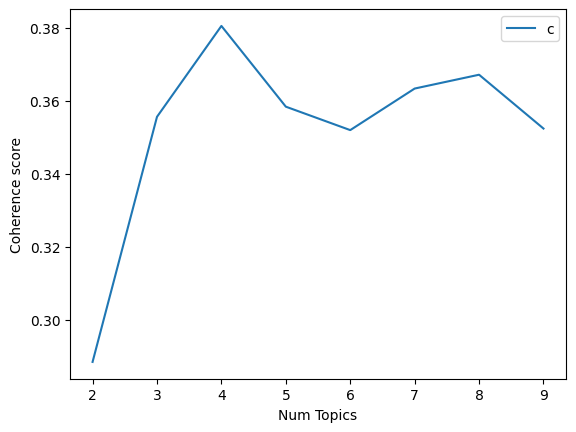

In [86]:
start=2
limit=10
step=1

model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [87]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 2  has Coherence Value of 0.288501
Num Topics = 3  has Coherence Value of 0.35566
Num Topics = 4  has Coherence Value of 0.38057
Num Topics = 5  has Coherence Value of 0.358444
Num Topics = 6  has Coherence Value of 0.35202
Num Topics = 7  has Coherence Value of 0.363407
Num Topics = 8  has Coherence Value of 0.367197
Num Topics = 9  has Coherence Value of 0.352449


# Building the Topic Model

Setelah memiliki semua yang diperlukan untuk melatih model LDA. Selain korpus dan kamus, Kita perlu memberikan jumlah topiknya juga. Jumlah topik yang diperoleh tadi adalah sebanyak 12.

In [88]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.031*"gunung_rap" + 0.025*"cocok" + 0.024*"tiket_masuk" + 0.018*"nya" + 0.016*"anak" + 0.016*"utk" + 0.016*"rap" + 0.016*"aja" + 0.016*"mahal" + 0.015*"bawa"
Topic: 1 Word: 0.063*"indah" + 0.031*"pandang" + 0.030*"bagus" + 0.023*"dingin" + 0.023*"cuaca" + 0.019*"foto" + 0.019*"nyaman" + 0.019*"dagang" + 0.016*"tiket_masuk" + 0.016*"banget"
Topic: 2 Word: 0.051*"bagus" + 0.047*"tangkuban_perahu" + 0.023*"kawah" + 0.023*"bau_belerang" + 0.020*"foto" + 0.018*"wisata" + 0.018*"perahu" + 0.016*"jual" + 0.016*"kunjung" + 0.016*"tangkuban"
Topic: 3 Word: 0.036*"dingin" + 0.033*"pandang" + 0.032*"bagus" + 0.031*"alam" + 0.024*"adem" + 0.023*"bandung" + 0.023*"nya" + 0.022*"kawah" + 0.020*"tempat" + 0.018*"ramah"


# Topic: 0 Word: 0.031*"gunung_rap" + 0.025*"cocok" + 0.024*"tiket_masuk" + 0.018*"nya" + 0.016*"anak" + 0.016*"utk" + 0.016*"rap" + 0.016*"aja" + 0.016*"mahal" + 0.015*"bawa"

# Topic: 1 Word: 0.063*"indah" + 0.031*"pandang" + 0.030*"bagus" + 0.023*"dingin" + 0.023*"cuaca" + 0.019*"foto" + 0.019*"nyaman" + 0.019*"dagang" + 0.016*"tiket_masuk" + 0.016*"banget"

# Topic: 2 Word: 0.051*"bagus" + 0.047*"tangkuban_perahu" + 0.023*"kawah" + 0.023*"bau_belerang" + 0.020*"foto" + 0.018*"wisata" + 0.018*"perahu" + 0.016*"jual" + 0.016*"kunjung" + 0.016*"tangkuban"

# Topic: 3 Word: 0.036*"dingin" + 0.033*"pandang" + 0.032*"bagus" + 0.031*"alam" + 0.024*"adem" + 0.023*"bandung" + 0.023*"nya" + 0.022*"kawah" + 0.020*"tempat" + 0.018*"ramah"

# Bagaimana menginterpretasikannya?

Topik 0 diwakili sebagai 0.103*”makan” + 0.075*”halal” + 0.063*”pedas” + 0.053*”korea” + 0.052*”lokasi” + 0.045*”murah” + 0.036*”lokasinya” + 0.034*”menu” + 0.031*”cafe” + 0.027*”nyaman”

Ini berarti 10 kata kunci teratas yang berkontribusi pada topik ini adalah: ‘makan’, ‘pedas’, ‘halal’, ‘korea’ .. dan seterusnya dan bobot ‘halal’ pada topik 0 adalah 0,075. Bobot mencerminkan betapa pentingnya kata kunci untuk topik itu.

# Menyimpan top word dalam bentuk csv

In [89]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df_hasil = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
df_hasil

# Topic Modeling Visualization

PyLDAvis dirancang untuk membantu pengguna menafsirkan topik dalam model topik yang sesuai dengan kumpulan data teks. Paket ini mengekstraksi informasi dari model topik LDA yang dipasang untuk menginformasikan visualisasi berbasis web interaktif. Visualisasi ini digunakan dalam notebook IPython tetapi juga dapat disimpan ke file HTML yang berdiri sendiri untuk memudahkan berbagi (pypi, 2018). PyLDAvis menyediakan dua panel visualisasi sebagai yang ditunjukkan pada panel sisi kiri menunjukkan topik secara keseluruhan. Pada panel bagian kiri juga dapat dilihat hubungan atau korelasi antara topik satu dengan yang lain dengan melihat peta jarak antar topik. Adapun bagian panel sebelah kanan memperlihatkan distribusi frekuensi kata yang muncul pada setiap topik yang dihasilkan.

Gambar di atas merupakan hasil visualisasi dari topic modeling, terdapat 3 topik yang akan aku bahas, apabila dipilih topik nomor 1, maka warna lingkaran akan berubah menjadi merah dan pada panel bagian kanan akan langsung menyesuaikan dengan memperlihatkan sejumlah 30 terminologi yang paling relevan terhadap topik tersebut. Bar chart berwarna biru pada panel bagian kanan mengindikasikan term frequency secara keseluruhan dalam corpus. Sedangkan bar chart berwarna merah menunjukkan estimasi term frequency pada topik yang dimaksud. Berikut disajikan visualisasi Topic modelling pada lingkaran nomor 1, 2, dan 3 yang menunjukkan hal yang paling responden ingin tanyakan terkait wisata kuliner yang ada di Kota Yogyakarta (karena dari part 1, data yang aku gunain adalah data pertanyaan tentang kulier di Kota Yogyakarta). Meskipun terdapat tiga topik yang banyak membahas mengenai “lokasi” wisata kuliner, ketiga topik tersebut memiliki model yang unik dan dapat merepresentasikan kesan lokasi yang berbeda.

In [90]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.072515  0.010042       1        1  28.552285
1      0.024348 -0.066333       2        1  26.280266
0      0.054771  0.044236       3        1  23.904547
3     -0.006604  0.012055       4        1  21.262902, topic_info=                 Term       Freq      Total Category  logprob  loglift
2    tangkuban_perahu   9.000000   9.000000  Default  30.0000  30.0000
41              indah  15.000000  15.000000  Default  29.0000  29.0000
110        gunung_rap   5.000000   5.000000  Default  28.0000  28.0000
12               alam   7.000000   7.000000  Default  27.0000  27.0000
105              adem   3.000000   3.000000  Default  26.0000  26.0000
..                ...        ...        ...      ...      ...      ...
29              udara   1.393291   6.328476   Topic4  -4.5116   0.0348
118             sejuk   1.395792   6.434653   Topic4  -4.5098   0

# WORDCLOUD

In [93]:
# Teks untuk wordcloud
teks_all = df['Review_clean'].to_list()
teks_all = ' '.join(teks_all)
teks_all

'tangkuban perahu tempat tarik bagus enak wisata ramai unjung ga bagi parkir pemandanganya ok plus kondisi alam nya terjagaminus tiket masuk laku utk lokasi utk masuk kawah domas bayar tiket parkir kendara utk masuk pala mohon ditertibkannomor menggangu nyaman tangkuban parahu bintang railguard pagar pinggir tambah tinggi alhamdulillah duduk indonesia tinggi pagar udara dingin udara dingin kesana hujan untung kawah tutup kabut wisata cocok keluarga seru arah pintu gerbang tikung asstro highland jalan lokasi lumayan pintu gerbang beli tiket masuk harga tiket masuk orang k kendara roda k tata parkir k indah nyaman refresing cocok bawa keluarga piknik dateng pagi pas kabut puncak gunung mudah transit mobil belah kawah salah tuju wisata bandung lembang lewat halhal dua tangkuban perahu beda bersih tata tata lokasi wisata nyaman mudah nikmat suasana bagus mantap pandang bagus cuaca bagus suka tinggi m muka laut pandang bandung udara nya dingin segar bagus healing indah pandang nya tangkuban

In [94]:
# Wordcloud review
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')
wordcloud.generate(teks_all)

c:\Users\satri\AppData\Local\Programs\Python\Python39\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


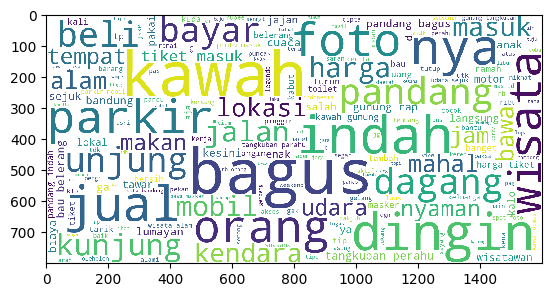

In [95]:
# Show Wordcloud
plt.imshow(wordcloud, interpolation="None")